#📌Image Classification using CNN Keras


---


▶ Intro to Aritificial Intelligence | Machine Learning

▶ By Hiba Hakkour

▶ Date: Decemeb 09th, 2023

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
import numpy as np
import seaborn as sns
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

#**📌 Load Dataset**

---



In [2]:
from keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


PS: Please note that there are 2000 images in the training set, represented as csv containing 100 pixel values and 400 images in the test set.

In the cifar-10 dataset, the training set contains 50000, while the testing set contains 10000 image.

**Reshaping & Normalization**

---


Initially every images is of size 30000 (100x100 pixels and 3 for RGB type). In this step, we will reshape into the appropriate image size [100,100,3] and normalize the values of the pixels to be [0,1] instead of [0,255] which are RGB values.



* Shape of X_train:  (2000, 30000)
* Shape of Y_train:  (2000,)
* Shape of X_test:  (400, 30000)
* Shape of Y_test:  (400,)




In [3]:
len(X_train)

50000

In [4]:
len(X_test)

10000

In [5]:

X_train = X_train.astype('float')
X_test = X_test.astype('float')

X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (50000, 32, 32, 3)
Shape of Y_train:  (50000, 1)
Shape of X_test:  (10000, 32, 32, 3)
Shape of Y_test:  (10000, 1)


# **CIFAR - 10**

---



#📌Data Exploration

---



In [7]:
# Find the unique numbers from the train labels
classes = np.unique(Y_train)
num_classes = len(classes)
print('Total number of outputs : ', num_classes)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


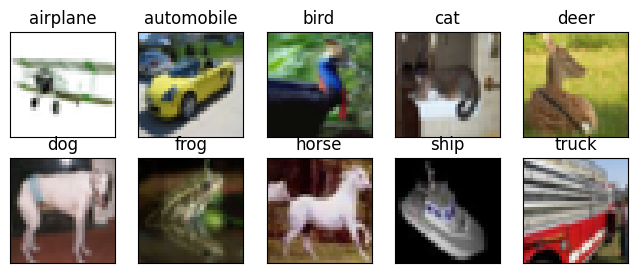

In [8]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize =(8, 3))
for i in range(num_classes):
    axis = fig.add_subplot(2, 5, 1+i, xticks = [], yticks = [])
    idx = np.where(Y_train[:] == i)[0]
    features_idx = X_train[idx, ::]
    image_num = np.random.randint(features_idx.shape[0])
    image = features_idx[image_num,::]
    axis.set_title(class_names[i])
    plt.imshow(image)
plt.show()

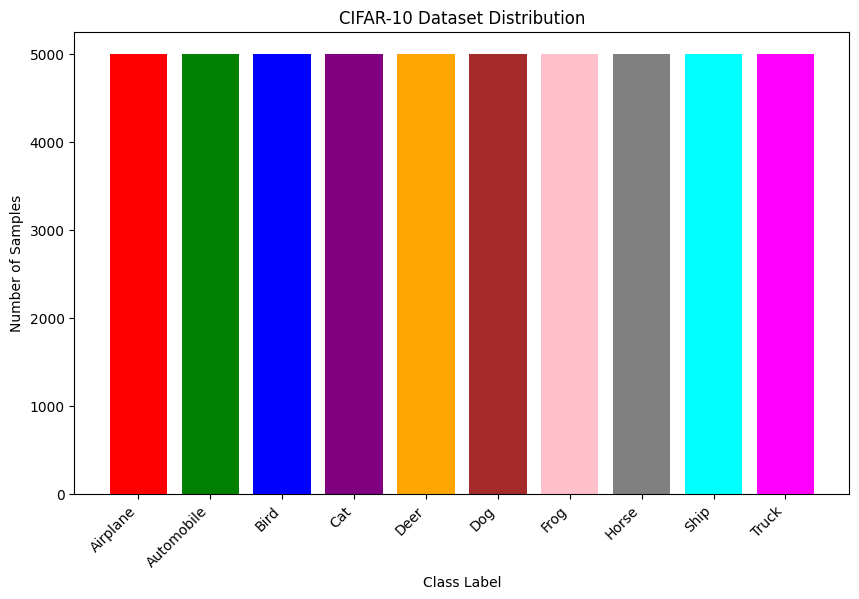

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(_, y_train), (_, _) = cifar10.load_data()

# Get the unique labels and their counts
unique_labels, counts = np.unique(y_train, return_counts=True)

# Define colors for each class
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plot the distribution with different colors
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_labels, counts, color=colors)
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('CIFAR-10 Dataset Distribution')

# Set class labels for better visualization
plt.xticks(unique_labels, ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'], rotation=45, ha='right')


plt.show()



#**Building the Model**

---



In [19]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [20]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 60
data_augmentation = False

In [21]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [22]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
history = model.fit(X_train, Y_train, epochs, batch_size, validation_data=(X_test, Y_test))

Epoch 1/32
834/834 [==============================] - 21s 10ms/step - loss: 0.2517 - accuracy: 0.3978 - val_loss: 0.2027 - val_accuracy: 0.5363
Epoch 2/32
834/834 [==============================] - 7s 8ms/step - loss: 0.1913 - accuracy: 0.5777 - val_loss: 0.1641 - val_accuracy: 0.6446
Epoch 3/32
834/834 [==============================] - 7s 8ms/step - loss: 0.1651 - accuracy: 0.6460 - val_loss: 0.1421 - val_accuracy: 0.6991
Epoch 4/32
834/834 [==============================] - 7s 9ms/step - loss: 0.1505 - accuracy: 0.6839 - val_loss: 0.1324 - val_accuracy: 0.7250
Epoch 5/32
834/834 [==============================] - 7s 8ms/step - loss: 0.1388 - accuracy: 0.7111 - val_loss: 0.1406 - val_accuracy: 0.7019
Epoch 6/32
834/834 [==============================] - 7s 8ms/step - loss: 0.1307 - accuracy: 0.7305 - val_loss: 0.1215 - val_accuracy: 0.7480
Epoch 7/32
834/834 [==============================] - 6s 8ms/step - loss: 0.1233 - accuracy: 0.7488 - val_loss: 0.1145 - val_accuracy: 0.7665
Epoc

In [25]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1036 - accuracy: 0.8078


[0.10358675569295883, 0.8077999949455261]

#**Making Predictions**

---



In [26]:
# Score trained model.
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1036 - accuracy: 0.8078
Test loss: 0.10358675569295883
Test accuracy: 0.8077999949455261
313/313 [==============================] - 1s 2ms/step


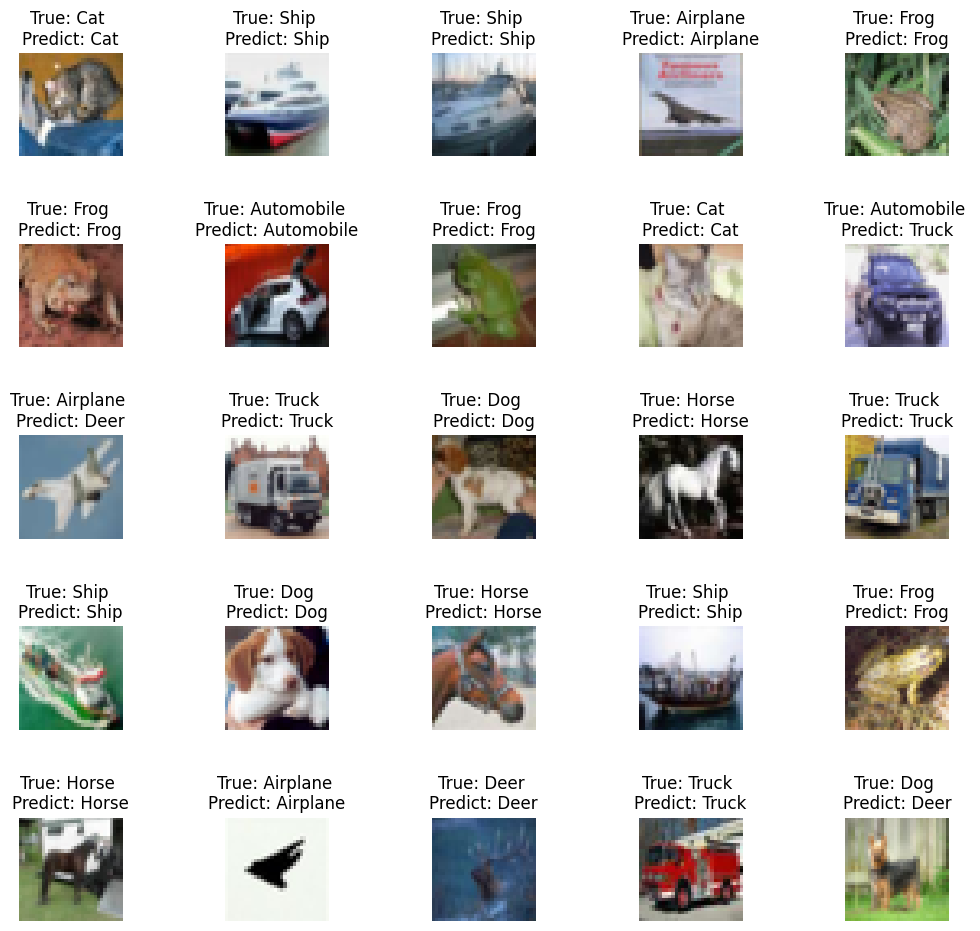

In [27]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis=1)

R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

#**Model Evaluation**

---


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


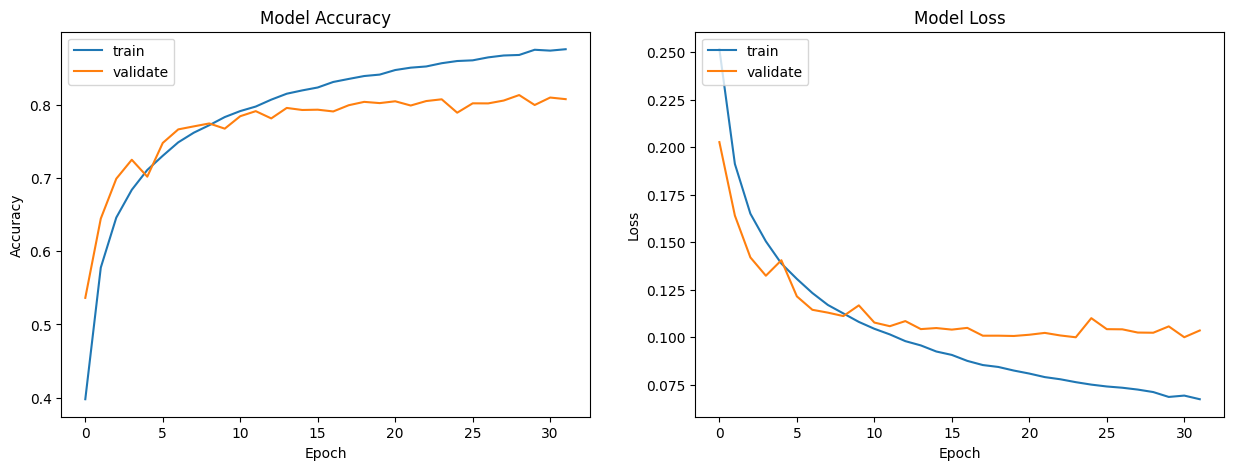

In [34]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)